In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense

# подключаем необходимые пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import re

Для того, чтобы пользователи могли явно видеть, как работает алгоритм на разных данных, решила вывести графики зависимости значения метрики от входных параметров. Почти на всех графиках разницу в ошибках на тестовой и обучающей выборках плохо видно, её хорошо видно только, когда мы хотим показать зависимость от объема входных данных.


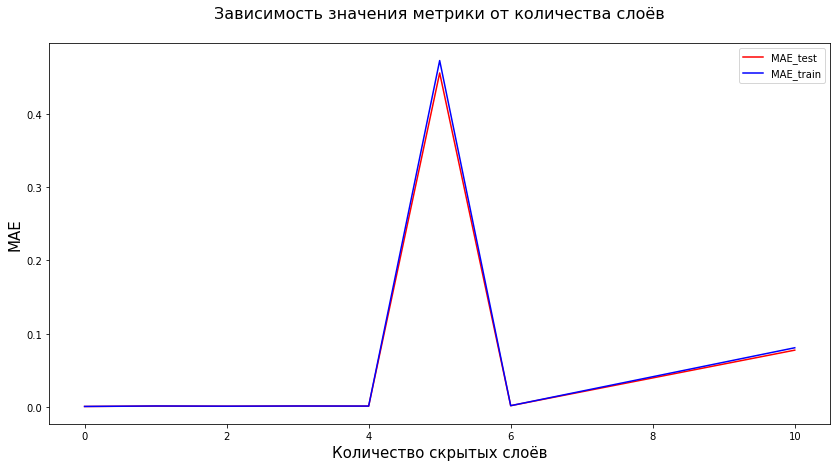

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 7))

plt.title("Зависимость значения метрики от количества слоёв", pad=25, size=16)
x_ax_test = [0, 1, 2, 3, 4, 5, 6, 10]
y_ax_test = [0.0009137004853403086, 0.0015101244927700856, 0.0012584779501489782, 0.0015801116943748189, 0.0014008085252133588, 0.45571670749180204, 0.001999814963340232, 0.07773336009970544]
x_ax_train = [0, 1, 2, 3, 4, 5, 6, 10]
y_ax_train = [0.0009625061990837935, 0.0015898987135493409, 0.0013459696532116146, 0.0015544161320401116, 0.0014800933521118074, 0.472623252590442, 0.0020398693323289002, 0.08097999331151168]
plt.plot(x_ax_test, y_ax_test, label='MAE_test', color='red')
plt.plot(x_ax_train, y_ax_train, label='MAE_train', color='blue')
plt.xlabel("Количество скрытых слоёв", size=15)
plt.ylabel("MAE", size=15)
plt.legend()

Переобучение при изменении количества выходов в каждом слое.

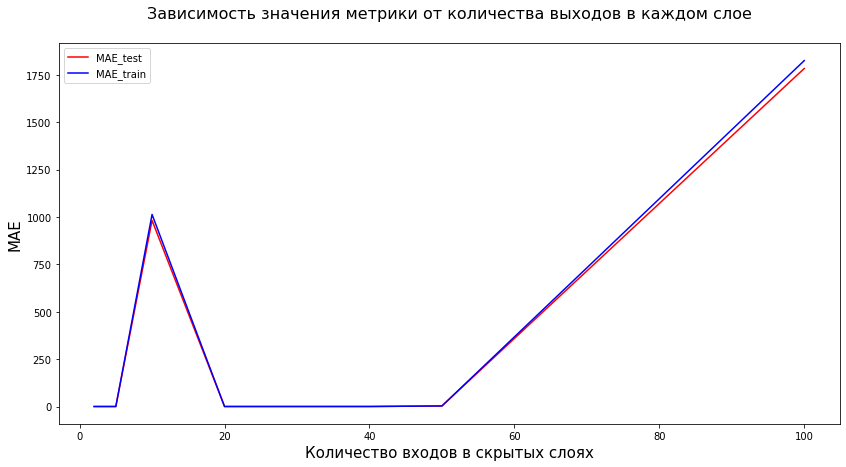

In [ ]:
fig = plt.figure(figsize=(14, 7))

plt.title("Зависимость значения метрики от количества выходов в каждом слое", pad=25, size=16)
x_ax_test = [2, 3, 5, 10, 20, 40, 50, 100]
y_ax_test = [0.001887973117935804, 0.0017098469258244443, 0.0032077036856936326, 981.4662271161079, 0.0015641746520904454, 0.05475563127987043, 2.849745063972473, 1783.0431522460938]
x_ax_train = [2, 3, 5, 10, 20, 40, 50, 100]
y_ax_train = [0.0019204669794227552, 0.0017529004256911995, 0.003320640850039346, 1012.872752991422, 0.0016528374354303334, 0.05667309102211913, 2.8770906775474394, 1824.639893782552]
plt.plot(x_ax_test, y_ax_test, label='MAE_test', color='red')
plt.plot(x_ax_train, y_ax_train, label='MAE_train', color='blue')
plt.xlabel("Количество входов в скрытых слоях", size=15)
plt.ylabel("MAE", size=15)
plt.legend()

Решила посмотреть можно ли переобучить алгоритм при увеличении размера обучающей выборки. Протестировала алгоритм, в итоге, получился такой график. Сначала разница между ошибками на тестовой и обучающей не видна, но с ростом параметра, можно видеть, что на тестовой выборке алгоритм работает хуже.

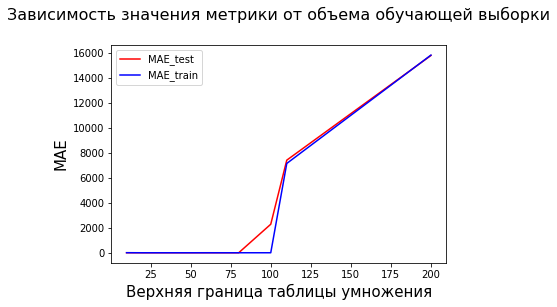

In [ ]:
plt.title("Зависимость значения метрики от объема обучающей выборки", pad=25, size=16)

x_ax_test = [10, 20, 50, 60, 80, 100, 110, 200]
y_ax_test = [2.705286798477175, 0.4470395982265394, 0.0006053275532765702, 2.687181021757376, 0.003318791246482351, 2287.0699264753357, 7426.13225703125, 15818.989867708333]
x_ax_train = [10, 20, 50, 60, 80, 100, 110, 200]
y_ax_train = [4.5372193098068205, 0.21848279436428536, 0.0005965472150628216, 0.0014097087582432568, 0.0027188644012586406, 0.005881068108809938, 7161.83078704427, 15851.212643460649]
plt.plot(x_ax_test, y_ax_test, label='MAE_test', color='red')
plt.plot(x_ax_train, y_ax_train, label='MAE_train', color='blue')
plt.xlabel("Верхняя граница таблицы умножения", size=15)
plt.ylabel("MAE", size=15)
plt.legend()

Зависимость от количества эпох

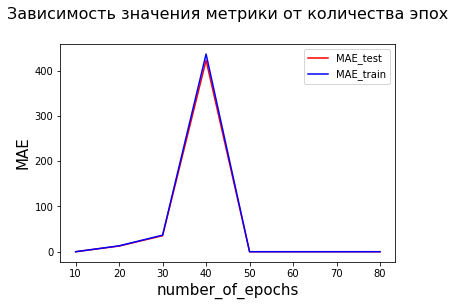

In [ ]:
plt.title("Зависимость значения метрики от количества эпох", pad=25, size=16)
x_ax_test = [10, 20, 30, 40, 50, 60, 80]
y_ax_test = [0.0011715110302667336, 12.599047166585995, 35.39986569850437, 423.12246885623944, 0.0014149128199302777, 0.0013756750107274706, 0.0012352236748547204]
x_ax_train = [10, 20, 30, 40, 50, 60, 80]
y_ax_train = [0.0012104484399972986, 12.986423975356471, 36.63207652838224, 437.1118340907733, 0.0014662855545897722, 0.0014339398384787339, 0.0013407566389469921]
plt.plot(x_ax_test, y_ax_test, label='MAE_test', color='red')
plt.plot(x_ax_train, y_ax_train, label='MAE_train', color='blue')
plt.xlabel("number_of_epochs", size=15)
plt.ylabel("MAE", size=15)
plt.legend()

Очень неожиданные результаты на самом деле.
(Где я видела, что нейронная сеть не сходится, выводила MAE не последней эпохи, а полученную на более ранних итерациях, так как динамики не наблюдалось)

In [ ]:
n_sacral = int(input('Количество скрытых слоёв:'))
n_epochs = int(input('Количество эпох:'))
print('Количество выходов в скрытых слоях(ввести число нужно столько раз, сколько скрытых слоёв вы хотели):')
inputs = []
for i in range(n_sacral):
  inputs.append(int(input()))
n_data = int(input('Введите верхнюю границу таблицы умножения:'))

data = np.ones(((n_data)**2, 2))
target = np.ones(((n_data)**2, 1))
for i in range(1, n_data):
  for j in range(1, n_data):
    data[n_data*i+j][0] = i
    data[n_data*i+j][1] = j

data_logged = np.log(data)
target = data_logged[:,0] + data_logged[:,1]

(trainX, testX, trainY, testY) = train_test_split(data_logged, target, test_size=0.25, random_state=42)


Количество скрытых слоёв:3
Количество эпох:13
Количество выходов в скрытых слоях(ввести число нужно столько раз, сколько скрытых слоёв вы хотели):
5
5
5
Введите верхнюю границу таблицы умножения:100


In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation=None))
for i in range(n_sacral):
  model.add(Dense(inputs[i], activation=None))
model.add(Dense(1, activation=None))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=opt, metrics=["mse"])

H = model.fit(trainX, trainY, validation_data=(testX, testY),
              epochs=n_epochs, batch_size=32)


Epoch 1/13
235/235 [==============================] - 2s 4ms/step - loss: 0.8019 - mse: 0.8019 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2/13
235/235 [==============================] - 1s 3ms/step - loss: 3.2030e-04 - mse: 3.2030e-04 - val_loss: 3.1362e-06 - val_mse: 3.1362e-06
Epoch 3/13
235/235 [==============================] - 1s 3ms/step - loss: 3.4863e-07 - mse: 3.4863e-07 - val_loss: 2.0076e-10 - val_mse: 2.0076e-10
Epoch 4/13
235/235 [==============================] - 1s 3ms/step - loss: 1.5715e-11 - mse: 1.5715e-11 - val_loss: 3.8358e-13 - val_mse: 3.8358e-13
Epoch 5/13
235/235 [==============================] - 1s 3ms/step - loss: 3.9807e-13 - mse: 3.9807e-13 - val_loss: 3.7125e-13 - val_mse: 3.7125e-13
Epoch 6/13
235/235 [==============================] - 1s 3ms/step - loss: 3.9231e-13 - mse: 3.9231e-13 - val_loss: 3.6756e-13 - val_mse: 3.6756e-13
Epoch 7/13
235/235 [==============================] - 1s 3ms/step - loss: 3.9426e-13 - mse: 3.9426e-13 - val_loss: 3.9750e-13 - 

In [ ]:
predictions = np.exp(model.predict(testX, batch_size=32, verbose=True))
predictions_train = np.exp(model.predict(trainX, batch_size=32,verbose=True))

235/235 [==============================] - 0s 2ms/step


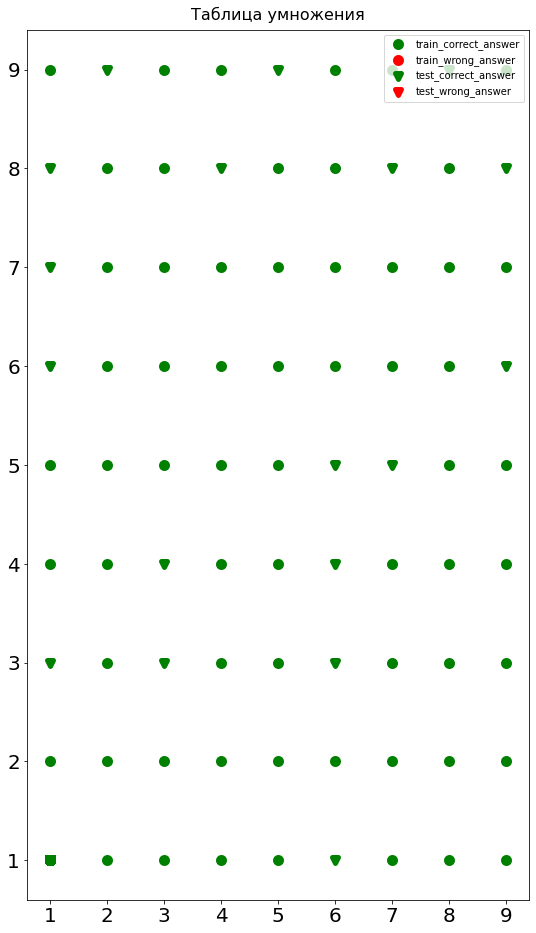

In [ ]:
y_train_true = np.exp(trainY)
y_test_true = np.exp(testY)
data_train = np.exp(trainX)
data_test = np.exp(testX)

mask1 = data_train[:,0]<=10
mask2 = data_train[:,1]<=10
mask3 = ((predictions_train >= (y_train_true[:,None] - 0.0001)) & (predictions_train <= (y_train_true[:,None] + 0.0001)))[:,0]
train_correct = mask1 & mask2 & mask3
train_error = mask1 & mask2 & ~mask3
x_train_correct = data_train[:,0][train_correct]
y_train_correct = data_train[:,1][train_correct]
x_train_error = data_train[:,0][train_error]
y_train_error = data_train[:,1][train_error]
mask1 = data_test[:,0]<=10
mask2 = data_test[:,1]<=10
mask3 = ((predictions >= (y_test_true[:, None] - 0.0001)) & (predictions <= (y_test_true[:,None] + 0.0001)))[:,0]
test_correct = mask1 & mask2 & mask3
test_error = mask1 & mask2 & ~mask3
x_test_correct = data_test[:,0][test_correct]
y_test_correct = data_test[:,1][test_correct]
x_test_error = data_test[:,0][test_error]
y_test_error = data_test[:,1][test_error]
plt.figure(figsize=(9, 16))
plt.title('Таблица умножения', size=16, pad=10)
plt.xticks(np.arange(0,11), np.arange(0,11), size=20)
plt.yticks(np.arange(0,11), np.arange(0,11), size=20)
plt.scatter(x_train_correct, y_train_correct, s=None, c='green', marker='o', linewidths=5, label='train_correct_answer')
plt.scatter(x_train_error, y_train_error, s=None, c='red', marker='o', linewidths=5, label='train_wrong_answer')
plt.scatter(x_test_correct, y_test_correct, s=None, c='green', marker='v', linewidths=5, label='test_correct_answer')
plt.scatter(x_test_error, y_test_error, s=None, c='red', marker='v', linewidths=5, label='test_wrong_answer')
plt.legend()
plt.show()

Плохо, конечно, что использована идея, которую использовали другие участники форума. Я попыталась узнать, можно ли сделать умножение как-то по-другому, и мне предложили идею сделать три входа (x+y)^2, x^2, y^2. Веса по половинке с определённым знаком дадут нам нужный результат. Функцию активации не стоит использовать в этом случае. Та же самая работа с пользователем, можно ввести нужное количество эпох, слоёв, выходов, объем данных. Теперь нейронная сеть работает с меньшей точностью. Значение считается угаданным, если оно лежит в диапазоне +-0.5.

In [ ]:
n_sacral = int(input('Количество скрытых слоёв:'))
n_epochs = int(input('Количество эпох:'))
print('Количество выходов в скрытых слоях(ввести число нужно столько раз, сколько скрытых слоёв вы хотели):')
inputs = []
for i in range(n_sacral):
  inputs.append(int(input()))
n_data = int(input('Введите верхнюю границу таблицы умножения:'))

data = np.ones(((n_data)**2, 3))
target = np.ones(((n_data)**2, 1))
for i in range(1, n_data):
  for j in range(1, n_data):
    data[n_data*i+j][0] = (i + j)
    data[n_data*i+j][1] = i
    data[n_data*i+j][2] = j
    target[n_data*i+j] = i*j

(trainX, testX, trainY, testY) = train_test_split(data, target, test_size=0.25, random_state=42)

trainX_sqr = trainX**2
testX_sqr = testX**2
model2 = Sequential()
model2.add(Dense(5, input_shape=(3,), activation=None))
for i in range(n_sacral):
  model2.add(Dense(inputs[i], activation=None))
model2.add(Dense(1, activation=None))

opt = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss="mse", optimizer=opt, metrics=["mse"])


model2.fit(trainX_sqr, trainY, validation_data=(testX, testY),
              epochs=n_epochs, batch_size=32)

predictions = model2.predict(testX_sqr, batch_size=32, verbose=True)
predictions_train = model2.predict(trainX_sqr, batch_size=32,verbose=True)

Количество скрытых слоёв:3
Количество эпох:30
Количество выходов в скрытых слоях(ввести число нужно столько раз, сколько скрытых слоёв вы хотели):
5
5
5
Введите верхнюю границу таблицы умножения:100
Epoch 1/30
235/235 [==============================] - 1s 3ms/step - loss: 242559.1406 - mse: 242559.1406 - val_loss: 10444182.0000 - val_mse: 10444182.0000
Epoch 2/30
235/235 [==============================] - 1s 2ms/step - loss: 6.0780 - mse: 6.0780 - val_loss: 10443917.0000 - val_mse: 10443917.0000
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 8664.3740 - mse: 8664.3740 - val_loss: 10445091.0000 - val_mse: 10445091.0000
Epoch 4/30
235/235 [==============================] - 1s 2ms/step - loss: 2.9490 - mse: 2.9490 - val_loss: 10444227.0000 - val_mse: 10444227.0000
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 11.9010 - mse: 11.9010 - val_loss: 10443640.0000 - val_mse: 10443640.0000
Epoch 6/30
235/235 [==============================] -

Выходные данные были обрезаны до нескольких последних строк (5000).
[150.         149.73565674]
[2465.         2465.12817383]
[2576.         2575.62402344]
[2842.         2841.66210938]
[2618.        2618.0480957]
[4350.         4349.73974609]
[2030.         2029.79748535]
[252.         251.35858154]
[1183.         1181.76062012]
[2928.        2927.8581543]
[5590.         5590.31689453]
[544.         543.37957764]
[21.         20.39649773]
[312.         311.29309082]
[144.        143.5451355]
[208.         207.45776367]
[95.         93.49462128]
[3608.         3608.17944336]
[4940.         4940.11669922]
[2952.         2952.13500977]
[4408.         4408.11474609]
[7221.         7221.32958984]
[1060.         1059.68725586]
[ 1.         -1.10901034]
[385.         384.15231323]
[1190.         1188.87060547]
[750.         748.95324707]
[4131.         4130.56494141]
[1056.         1055.78918457]
[4758.         4757.78076172]
[5369.         5368.64794922]
[4928.         4928.33642578]
[630. 

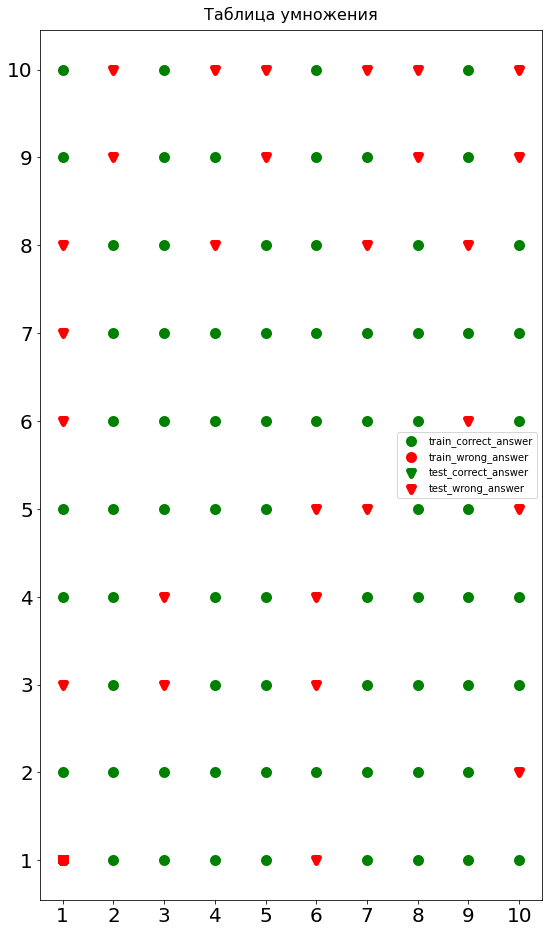

In [ ]:
y_train_true = trainY
y_test_true = testY
data_train = trainX
data_test = testX

for i in np.concatenate((y_train_true, predictions_train), axis=1):
  print(i)

mask1 = data_train[:,1]<=10
mask2 = data_train[:,2]<=10
mask3 = ((predictions_train >= (y_train_true - 0.7)) & (predictions_train <= (y_train_true + 0.7)))[:,0]
train_correct = mask1 & mask2 & mask3
train_error = mask1 & mask2 & ~mask3
x_train_correct = data_train[:,1][train_correct]
y_train_correct = data_train[:,2][train_correct]
x_train_error = data_train[:,1][train_error]
y_train_error = data_train[:,2][train_error]
mask1 = data_test[:,1]<=10
mask2 = data_test[:,2]<=10
mask3 = ((predictions >= (y_test_true - 0.5)) & (predictions <= (y_test_true + 0.5)))[:,0]
test_correct = mask1 & mask2 & mask3
test_error = mask1 & mask2 & ~mask3
print(test_error)
x_test_correct = data_test[:,1][test_correct]
y_test_correct = data_test[:,2][test_correct]
x_test_error = data_test[:,1][test_error]
y_test_error = data_test[:,2][test_error]
plt.figure(figsize=(9, 16))
plt.title('Таблица умножения', size=16, pad=10)
plt.xticks(np.arange(0,11), np.arange(0,11), size=20)
plt.yticks(np.arange(0,11), np.arange(0,11), size=20)
plt.scatter(x_train_correct, y_train_correct, s=None, c='green', marker='o', linewidths=5, label='train_correct_answer')
plt.scatter(x_train_error, y_train_error, s=None, c='red', marker='o', linewidths=5, label='train_wrong_answer')
plt.scatter(x_test_correct, y_test_correct, s=None, c='green', marker='v', linewidths=5, label='test_correct_answer')
plt.scatter(x_test_error, y_test_error, s=None, c='red', marker='v', linewidths=5, label='test_wrong_answer')
plt.legend()
plt.show()